<div class="list-group" id="list-tab" role="tablist">
  <h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">Notebook Content</h3>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#Introduction" role="tab" aria-controls="profile">Introduction<span class="badge badge-primary badge-pill"></span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#PCA" role="tab" aria-controls="messages">PCA<span class="badge badge-primary badge-pill"></span></a>
  <a class="list-group-item list-group-item-action"  data-toggle="list" href="#LDA" role="tab" aria-controls="settings">LDA<span class="badge badge-primary badge-pill"></span></a>
    <a class="list-group-item list-group-item-action"  data-toggle="list" href="#SVD" role="tab" aria-controls="settings">SVD<span class="badge badge-primary badge-pill"></span></a>
    <a class="list-group-item list-group-item-action"  data-toggle="list" href="#PLSR" role="tab" aria-controls="settings">PLSR<span class="badge badge-primary badge-pill"></span></a>
     <a class="list-group-item list-group-item-action"  data-toggle="list" href="#t-SNE" role="tab" aria-controls="settings">t-SNE<span class="badge badge-primary badge-pill"></span></a>
      <a class="list-group-item list-group-item-action"  data-toggle="list" href="#Factor-Analysis" role="tab" aria-controls="settings">Factor Analysis<span class="badge badge-primary badge-pill"></span></a>
    </div>

# Introduction

In machine learning classification problems, there are often too many factors on the basis of which the final classification is done. These factors are basically variables called features. The higher the number of features, the harder it gets to visualize the training set and then work on it. Sometimes, most of these features are correlated, and hence redundant. This is where dimensionality reduction algorithms come into play. Dimensionality reduction is the process of reducing the number of random variables under consideration, by obtaining a set of principal variables. It can be divided into feature selection and feature extraction.

** Why Dimensionality reduction techniques are required **
An intuitive example of dimensionality reduction can be discussed through a simple e-mail classification problem, where we need to classify whether the e-mail is spam or not. This can involve a large number of features, such as whether or not the e-mail has a generic title, the content of the e-mail, whether the e-mail uses a template, etc. However, some of these features may overlap. In another condition, a classification problem that relies on both humidity and rainfall can be collapsed into just one underlying feature, since both of the aforementioned are correlated to a high degree. Hence, we can reduce the number of features in such problems. A 3-D classification problem can be hard to visualize, whereas a 2-D one can be mapped to a simple 2 dimensional space, and a 1-D problem to a simple line

# PCA

Principal Component Analysis is a fundamentally a simple dimensionality reduction technique that transforms the columns of a dataset into a new set features called Principal Components (PCs).

The information contained in a column is the amount of variance it contains. The primary objective of Principal Components is to represent the information in the dataset with minimum columns possible.

To simplify things, let’s imagine a dataset with only two columns. Using these two columns, I want to find a new column that better represents the ‘data’ contributed by these two columns.
This new column can be thought of as a line that passes through these points.

Such a line can be represented as a linear combination of the two columns and explains the maximum variation present in these two columns.
Following is interactive example of on which direction the dimensions needs to be created
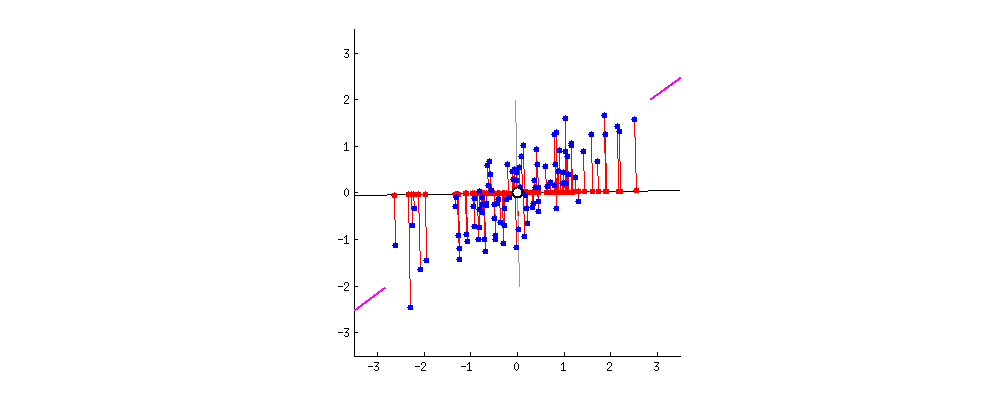

The line should be in a direction that minimizes the perpendicular distance of each point from the line and explains the maximum variance and it should look something like this. Now we see the axis are being changed
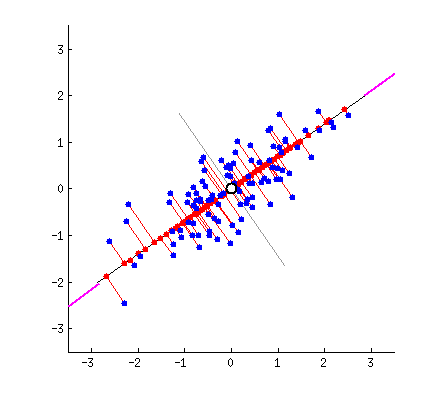


How to determine this line/axis

** Stepwise explanation of PCA **
1. Standardize the data
2. Compute the covariance matrix of the features from the dataset.
3. Perform eigen decomposition on the covariance matrix.
4. Order the eigenvectors in decreasing order based on the magnitude of their corresponding eigenvalues.
5. Determine k, the number of top principal components to select.
6. Construct the projection matrix from the chosen number of top principal components.
7. Compute the new k-dimensional feature space.

** Example how new axis are able to maximize the variance **
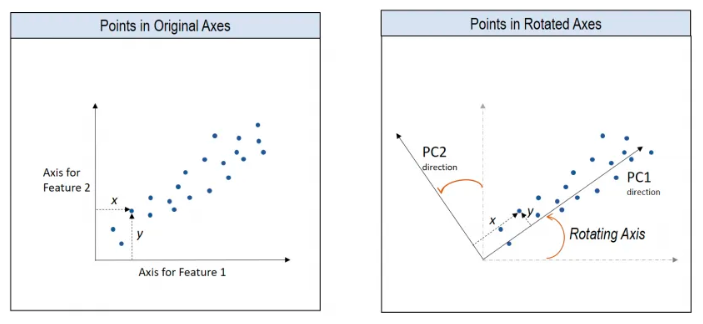



## Code implimentation of PCA

In [1]:
# We are using breast cancer Data set for doing PCA, available in the following link. 
# Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.
# They describe characteristics of the cell nuclei present in the image

 
# Attribute Information:

# 1) ID number
# 2) Diagnosis (M = malignant, B = benign)
# 3-32)

# Ten real-valued features are computed for each cell nucleus:

# a) radius (mean of distances from center to points on the perimeter)
# b) texture (standard deviation of gray-scale values)
# c) perimeter
# d) area
# e) smoothness (local variation in radius lengths)
# f) compactness (perimeter^2 / area - 1.0)
# g) concavity (severity of concave portions of the contour)
# h) concave points (number of concave portions of the contour)
# i) symmetry
# j) fractal dimension


# Reading data directly from source
wdbc = read.table("http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data",sep = ",")
# Renaming column names
features <- c("radius", "texture", "perimeter", "area", "smoothness", "compactness", "concavity", "concave_points", "symmetry", "fractal_dimension")
# Again renaming
names(wdbc) <- c("id", "diagnosis", paste0(features,"_mean"), paste0(features,"_se"), paste0(features,"_worst"))

In [2]:
head(wdbc)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
2,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
3,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
4,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
5,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
6,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [3]:
# Using Native prcomp function
# also removing the target column and id column before applying PCA

wdbc.pr <- prcomp(wdbc[c(3:32)], center = TRUE, scale = TRUE)
summary(wdbc.pr)

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     3.6444 2.3857 1.67867 1.40735 1.28403 1.09880 0.82172
Proportion of Variance 0.4427 0.1897 0.09393 0.06602 0.05496 0.04025 0.02251
Cumulative Proportion  0.4427 0.6324 0.72636 0.79239 0.84734 0.88759 0.91010
                           PC8    PC9    PC10   PC11    PC12    PC13    PC14
Standard deviation     0.69037 0.6457 0.59219 0.5421 0.51104 0.49128 0.39624
Proportion of Variance 0.01589 0.0139 0.01169 0.0098 0.00871 0.00805 0.00523
Cumulative Proportion  0.92598 0.9399 0.95157 0.9614 0.97007 0.97812 0.98335
                          PC15    PC16    PC17    PC18    PC19    PC20   PC21
Standard deviation     0.30681 0.28260 0.24372 0.22939 0.22244 0.17652 0.1731
Proportion of Variance 0.00314 0.00266 0.00198 0.00175 0.00165 0.00104 0.0010
Cumulative Proportion  0.98649 0.98915 0.99113 0.99288 0.99453 0.99557 0.9966
                          PC22    PC23   PC24 

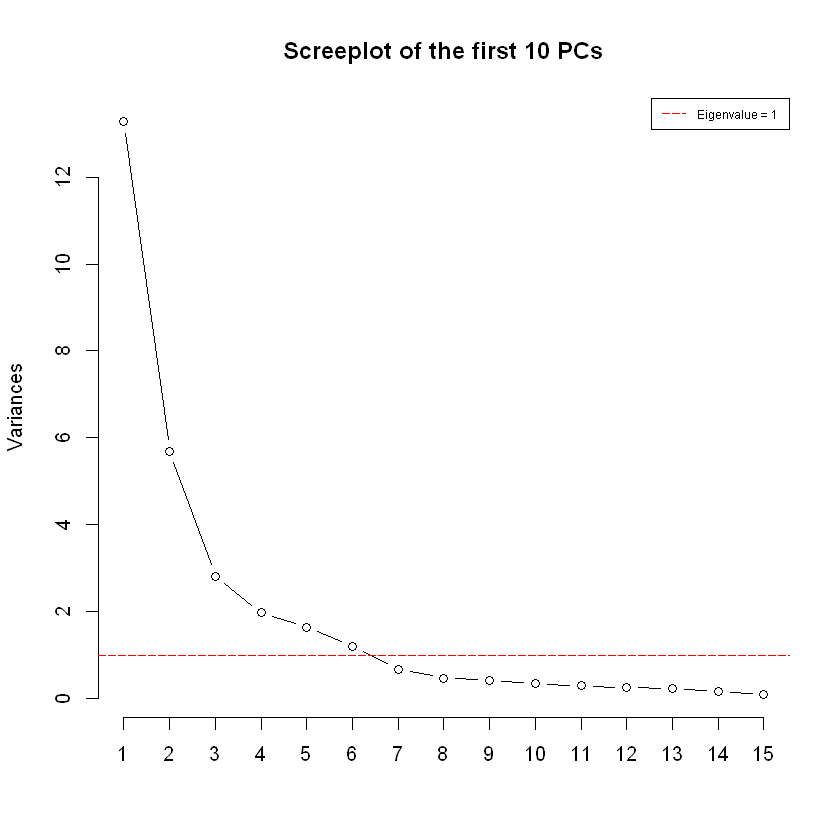

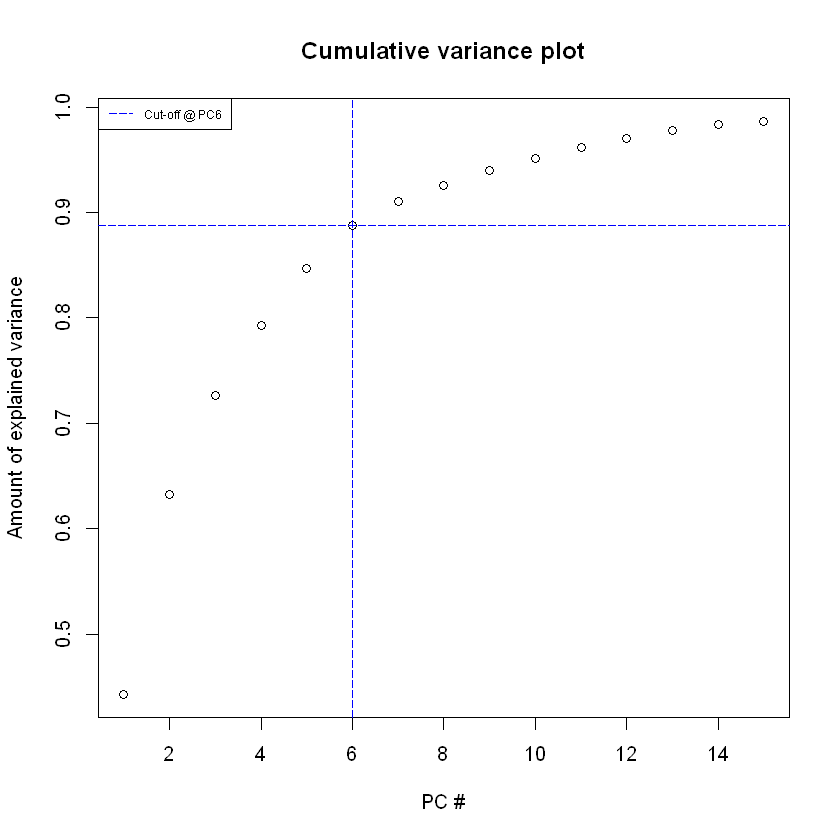

In [4]:
# Screeplot for 1st 10 principal componets.
screeplot(wdbc.pr, type = "l", npcs = 15, main = "Screeplot of the first 10 PCs")
# Drawing a line
abline(h = 1, col="red", lty=5)
# Adding the legends
legend("topright", legend=c("Eigenvalue = 1"),
       col=c("red"), lty=5, cex=0.6)

# Cumulative variance plot
# calculating cumulative variance
cumpro <- cumsum(wdbc.pr$sdev^2 / sum(wdbc.pr$sdev^2))
# Plot for cumulative variance
plot(cumpro[0:15], xlab = "PC #", ylab = "Amount of explained variance", main = "Cumulative variance plot")
# Straight lines being drawn
abline(v = 6, col="blue", lty=5)
abline(h = 0.88759, col="blue", lty=5)
#Adding the legends
legend("topleft", legend=c("Cut-off @ PC6"),
       col=c("blue"), lty=5, cex=0.6)

We notice is that the first 6 components has an Eigenvalue >1 and explains almost 90% of variance, this is great! We can effectively reduce dimensionality from 30 to 6 while only “loosing” about 10% of variance!
We also notice that we can actually explain more than 60% of variance with just the first two components.

Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



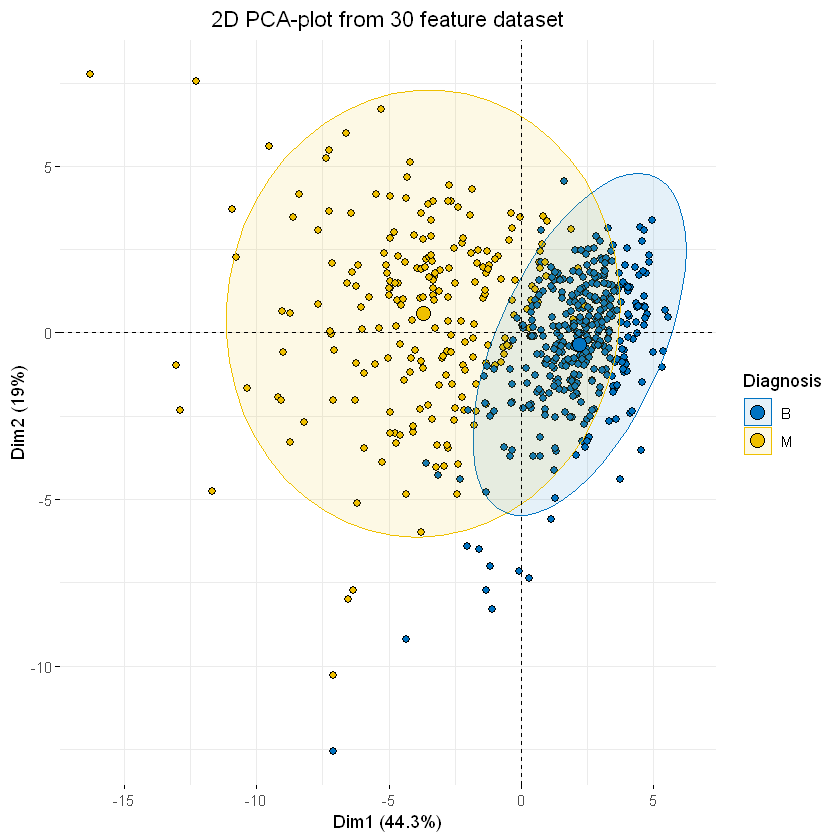

In [5]:
library(factoextra)

# PCA 2D plot to check how the target variable can be explained by only two selected PCs 
fviz_pca_ind(wdbc.pr, geom.ind = "point", pointshape = 21, 
             pointsize = 2, 
             fill.ind = wdbc$diagnosis, 
             col.ind = "black", 
             palette = "jco", 
             addEllipses = TRUE,
             label = "var",
             col.var = "black",
             repel = TRUE,
             legend.title = "Diagnosis") +
  ggtitle("2D PCA-plot from 30 feature dataset") +
  theme(plot.title = element_text(hjust = 0.5))


Now we see the beauty of PCA. With just the first two components we can clearly see some separation between the benign and malignant tumors. This is a clear indication that the data is well-suited for some kind of classification model 

# LDA

## Linear Discriminant Analysis

Simply using the two dimension in the plot above we could probably get some pretty good estimates but higher-dimensional data is difficult to grasp (but also accounts for more variance), thankfully that’s what LDA is for, it’ll try to find the ‘cutoff’ or ‘discision boundry’ at which we’re most successful in our classification

** How it is different from PCA **

Consider only two dimension with two distinct clusters. LDA will project these clusters down to one dimension. Imagine it creating separate probability density functions for each class / cluster, then we try to maximize the difference between these (effectively by minimizing the area of ‘overlap’ between them)

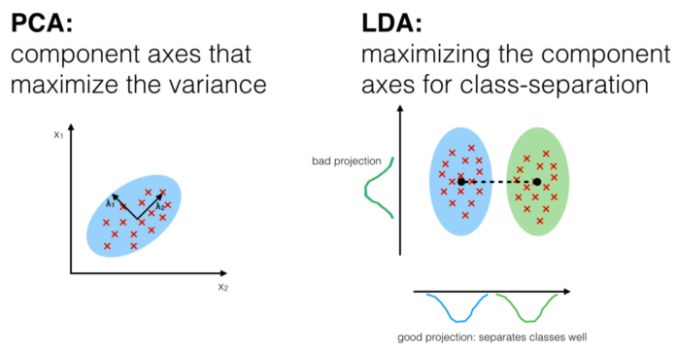

In the example above we have a perfect separation of the blue and green cluster along the x-axis. This means that if future points of data behave according to the proposed probability density functions, then we should be able to perfectly classify them as either blue or green.



In [6]:
library(ROCR)
library(MASS)

In [7]:
# Reading data directly from source
wdbc = read.table("http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data",sep = ",")
# Renaming column names
features <- c("radius", "texture", "perimeter", "area", "smoothness", "compactness", "concavity", "concave_points", "symmetry", "fractal_dimension")
# Again renaming
names(wdbc) <- c("id", "diagnosis", paste0(features,"_mean"), paste0(features,"_se"), paste0(features,"_worst"))

In [8]:
# selecting the columns for training
wdbc.data <- as.matrix(wdbc[,c(3:32)])
# Renaming the indexes
row.names(wdbc.data) <- wdbc$id
# converting the Target fariable as a factor
wdbc_raw <- cbind(wdbc.data,as.factor(wdbc$diagnosis))
# Renaming the added columns
colnames(wdbc_raw)[31] <- "diagnosis"

In [9]:
# Doing a train test split at 75% train and 25% test
smp_size_raw <- floor(0.75 * nrow(wdbc_raw))
train_ind_raw <- sample(nrow(wdbc_raw), size = smp_size_raw)
train_raw.df <- as.data.frame(wdbc_raw[train_ind_raw, ])
test_raw.df <- as.data.frame(wdbc_raw[-train_ind_raw, ])

In [10]:
# Creating the LDA formulta
f <- paste(names(train_raw.df)[31], "~", paste(names(train_raw.df)[-31], collapse="+"))
# Fitting the LDA model
wdbc_raw.lda <- lda(as.formula(paste(f)), data = train_raw.df)

In [11]:
# Predicting from the LDA model
wdbc_raw.lda.predict <- predict(wdbc_raw.lda, newdata = test_raw.df)

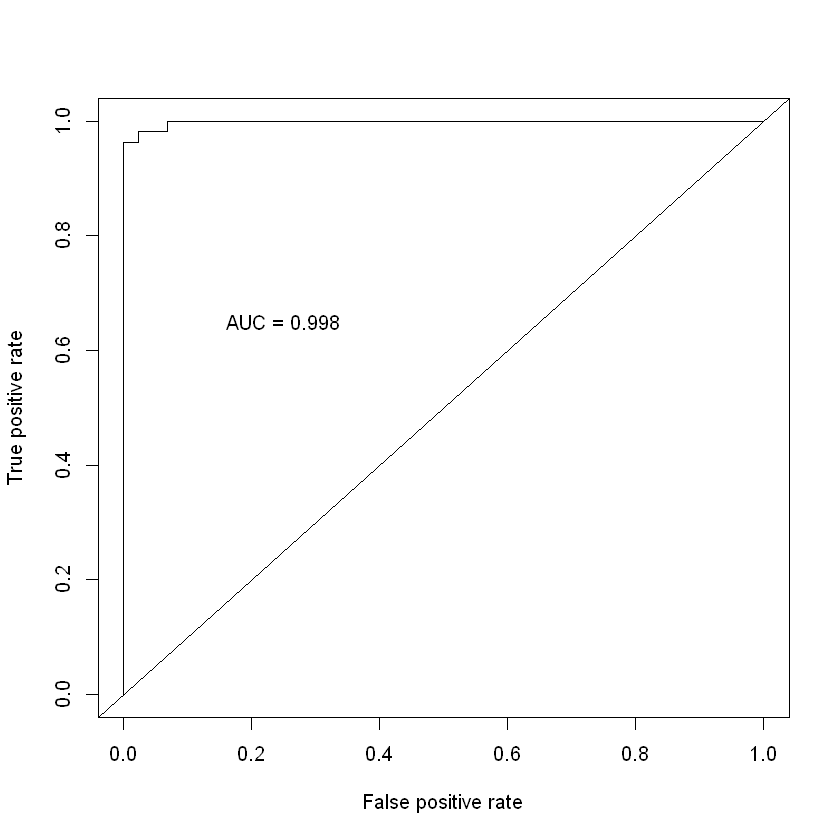

In [12]:
### CONSTRUCTING ROC AUC PLOT:
# Get the posteriors as a dataframe.
wdbc_raw.lda.predict.posteriors <- as.data.frame(wdbc_raw.lda.predict$posterior)
# Evaluate the model
pred <- prediction(wdbc_raw.lda.predict.posteriors[,2], test_raw.df$diagnosis)
roc.perf = performance(pred, measure = "tpr", x.measure = "fpr")
auc.train <- performance(pred, measure = "auc")
auc.train <- auc.train@y.values
# Plot
plot(roc.perf)
abline(a=0, b= 1)
text(x = .25, y = .65 ,paste("AUC = ", round(auc.train[[1]],3), sep = ""))

# SVD

## Singular Value Dicomposition

SVD, or Singular Value Decomposition, is one of several techniques that can be used to reduce the dimensionality, i.e., the number of columns, of a data set. Why would we want to reduce the number of dimensions? In predictive analytics, more columns normally means more time required to build models and score data. If some columns have no predictive value, this means wasted time, or worse, those columns contribute noise to the model and reduce model quality or predictive accuracy.

SVD is an algorithm that factors an m x n matrix, M, of real or complex values into three component matrices, where the factorization has the form USV*. U is an m x p matrix. S is a p x p diagonal matrix. V is an n x p matrix, with V* being the transpose of V, a p x n matrix, or the conjugate transpose if M contains complex values. The value p is called the rank. The diagonal entries of S are referred to as the singular values of M. The columns of U are typically called the left-singular vectors of M, and the columns of V are called the right-singular vectors of M.
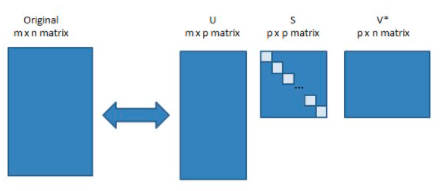

One of the features of SVD is that given the decomposition of M into U, S, and V, one can reconstruct the original matrix M, or an approximation of it. The singular values in the diagonal matrix S can be used to understand the amount of variance explained by each of the singular vectors.

It is very much useful in sparse matrix and image compression.

Following is an example of image compression

In [13]:
# install dependency packages rgdal 
# install.packages("rgdal")
suppressWarnings(library(raster))


Loading required package: sp


Attaching package: 'raster'


The following objects are masked from 'package:MASS':

    area, select




In [14]:
setwd("C:/Users/sidhartha/Downloads") 
img<-'flower.png'
# Converting the image to bitmap(3 dimension matrix)
rasterimg<-raster(img)
img.flip<-flip(rasterimg, direction = "y")
rasterimg<-t(as.matrix(img.flip))
dim(rasterimg)

[1] 278 181

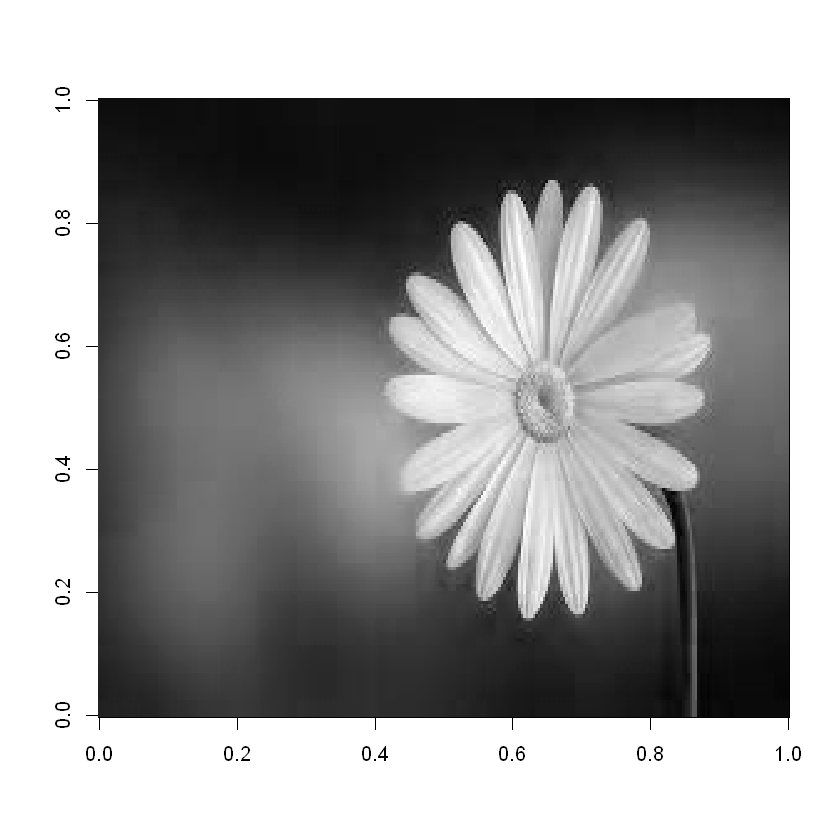

In [15]:
# converting the image to grey scale
image(rasterimg, col = grey(seq(0, 1, length = 256))) 

In [16]:
# Decomposing the image into U,d and V

svdimg<-svd(rasterimg)
U<-svdimg$u
d<-diag(svdimg$d)
V<-svdimg$v

### As the image is decomposed into U d and v, lets try to recreate the image

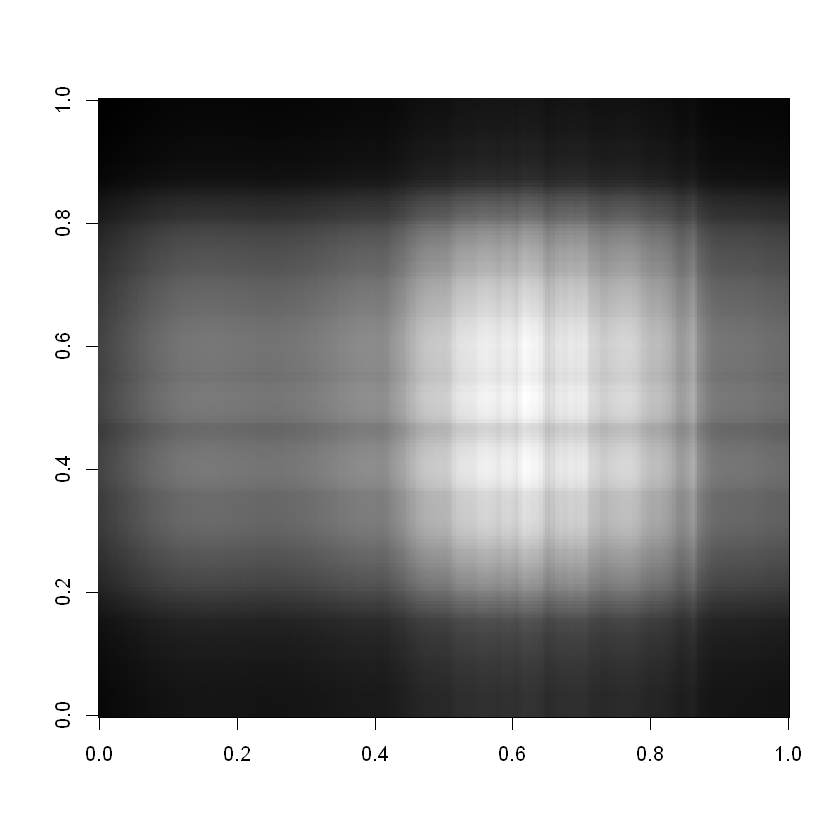

In [17]:
#  Using only one singular value

U1 <- as.matrix(U[, 1])
d1 <- as.matrix(d[1, 1])
V1 <- as.matrix(V[, 1])

# Equation of SVD
img1 <- U1 %*% d1 %*% t(V1)


image(img1, col = grey(seq(0, 1, length = 256)))

The image looks etremely distorted and nothing can be infered from it

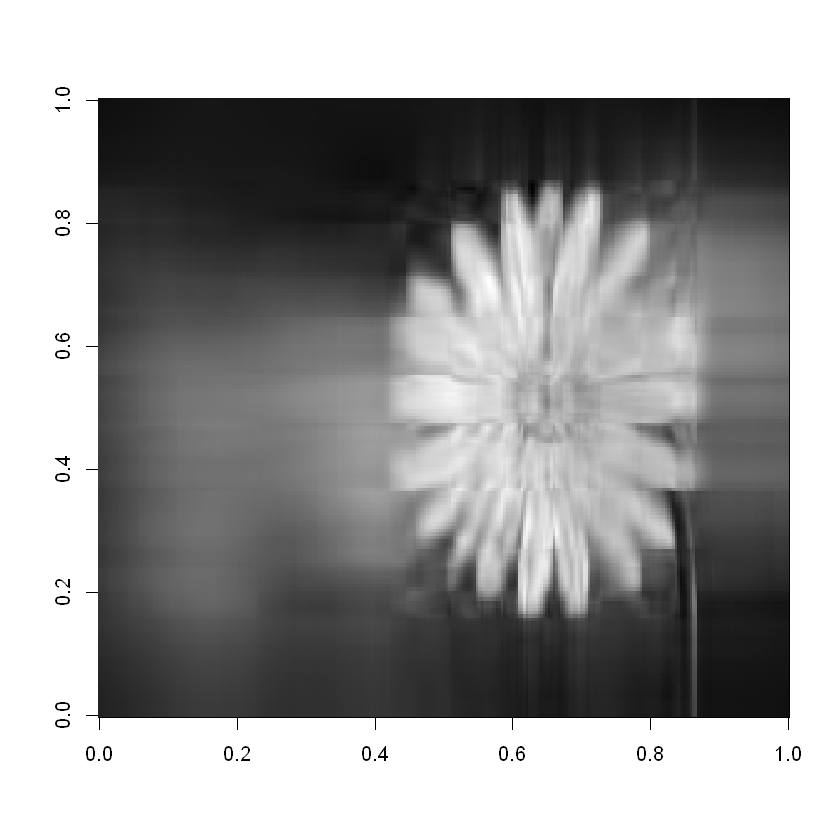

In [18]:
# Using 10 singular value

U10 <- as.matrix(U[, 1:10])
d10 <- as.matrix(d[1:10, 1:10])
V10 <- as.matrix(V[, 1:10])

img10 <- U10 %*% d10 %*% t(V10)
image(img10, col = grey(seq(0, 1, length = 256)))

The image looks a bit better then before but still distorted 

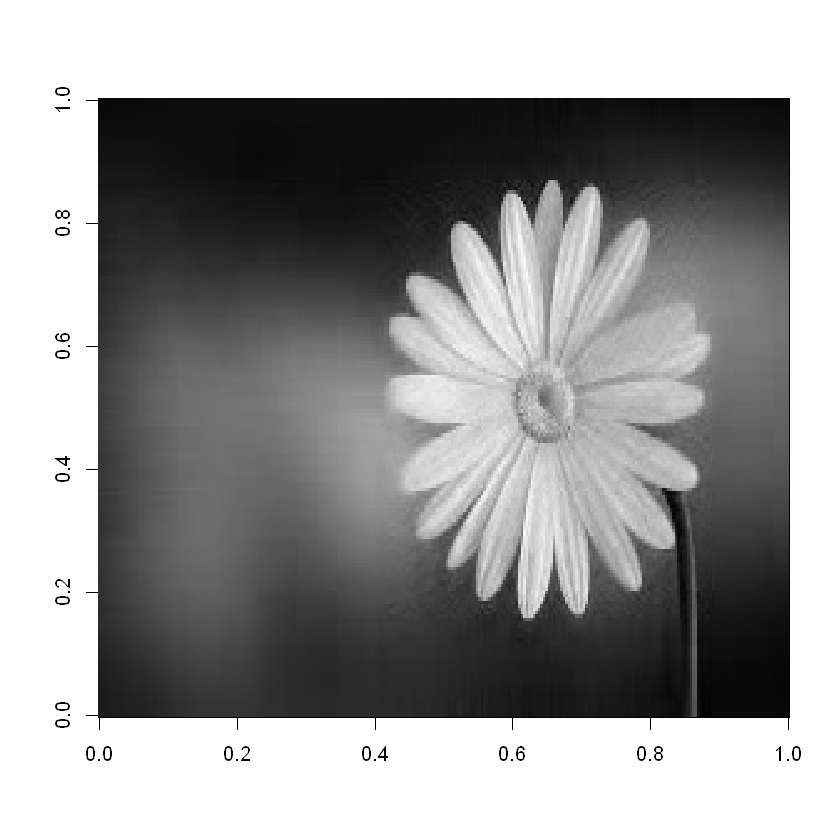

In [19]:
# Using 50 singular value

U50 <- as.matrix(U[, 1:50])
d50 <- as.matrix(d[1:50, 1:50])
V50 <- as.matrix(V[, 1:50])

img50 <- U50 %*% d50 %*% t(V50)
image(img50, col = grey(seq(0, 1, length = 256)))

There we go. Although we are selecting first 50 singular values out of total 181, we are getting quite good approximation for our image.

# t-SNE

(t-SNE) t-Distributed Stochastic Neighbor Embedding is a non-linear dimensionality reduction algorithm used for exploring high-dimensional data. It maps multi-dimensional data to two or more dimensions suitable for human observation. With help of the t-SNE algorithms

** Limitations of PCA **

PCA is a linear algorithm. It will not be able to interpret complex polynomial relationship between features. On the other hand, t-SNE is based on probability distributions with random walk on neighborhood graphs to find the structure within the data.

A major problem with, linear dimensionality reduction algorithms is that they concentrate on placing dissimilar data points far apart in a lower dimension representation. But in order to represent high dimension data on low dimension, non-linear manifold, it is important that similar datapoints must be represented close together, which is not what linear dimensionality reduction algorithms do.

** Working of t-SNE **

It’s quite simple actually, t-SNE a non-linear dimensionality reduction algorithm finds patterns in the data by identifying observed clusters based on similarity of data points with multiple features. But it is not a clustering algorithm it is a dimensionality reduction algorithm. This is because it maps the multi-dimensional data to a lower dimensional space, the input features are no longer identifiable. Thus you cannot make any inference based only on the output of t-SNE. So essentially it is mainly a data exploration and visualization technique.

But t-SNE can be used in the process of classification and clustering by using its output as the input feature for other classification algorithms.

## Simple implementation of t-SNE in R using Iris data set

In [20]:
# install.packages("tsne")
library(tsne)

Warning message in if (class(X) == "dist") {:
"the condition has length > 1 and only the first element will be used"
sigma summary: Min. : 0.565012665854053 |1st Qu. : 0.681985646004023 |Median : 0.713004330336136 |Mean : 0.716213420895748 |3rd Qu. : 0.74581655363904 |Max. : 0.874979764925049 |

Epoch: Iteration #100 error is: 12.260713678786

Epoch: Iteration #200 error is: 0.198190687335118

Epoch: Iteration #300 error is: 0.198161767881793

Epoch: Iteration #400 error is: 0.198161746861966

Epoch: Iteration #500 error is: 0.198161746861653

Epoch: Iteration #600 error is: 0.198161746861653

Epoch: Iteration #700 error is: 0.198161746861654

Epoch: Iteration #800 error is: 0.198161746861653

Epoch: Iteration #900 error is: 0.198161746861653

Epoch: Iteration #1000 error is: 0.198161746861653



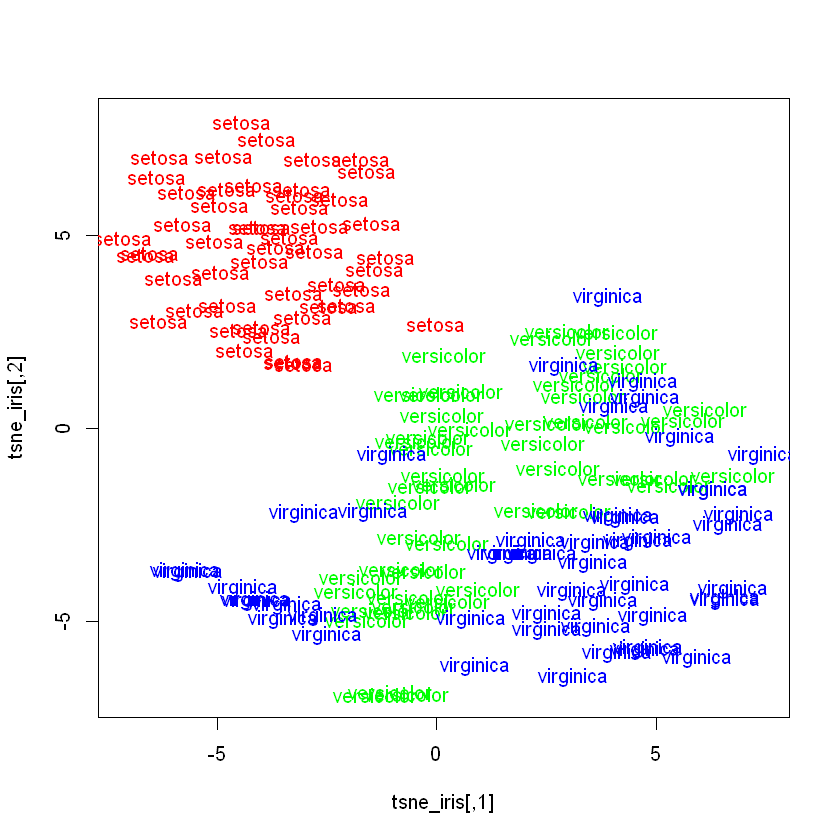

In [21]:
# Getting the unique colurs for each of the 
colors = rainbow(length(unique(iris$Species)))
names(colors) = unique(iris$Species)
# Fitting t-sne model
tsne_iris = tsne(iris[,1:4], perplexity=50)
# Plotting the model
plot(tsne_iris, t='n')
# Explaining t-sne with 2 components 
text(tsne_iris, labels=iris$Species,col=colors[iris$Species])


This figure explains how tsne is able to explain the iris data set with 2 components, its clear from the figure that t-SNE is able find non-linear relationship in the data

# Factor-Analysis

Factor analysis is a linear statistical model. It is used to explain the variance among the observed variable and condense a set of the observed variable into the unobserved variable called factors. Observed variables are modeled as a linear combination of factors and error terms. Factor or latent variable is associated with multiple observed variables, who have common patterns of responses. Each factor explains a particular amount of variance in the observed variables. It helps in data interpretations by reducing the number of variables.

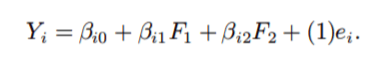

Factor analysis is a method for investigating whether a number of variables of interest X1, X2,……., Xl, are linearly related to a smaller number of unobservable factors F1, F2,..……, Fk.

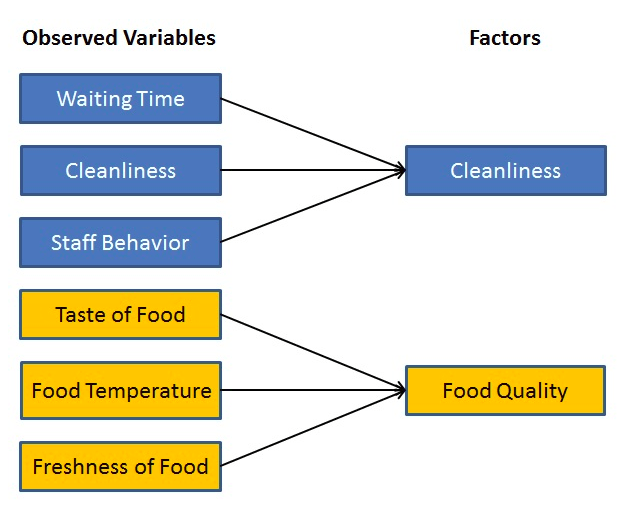

** How does factor analysis work? **

The primary objective of factor analysis is to reduce the number of observed variables and find unobservable variables. These unobserved variables help the market researcher to conclude the survey. This conversion of the observed variables to unobserved variables can be achieved in two steps:
<br>
Factor Extraction: In this step, the number of factors and approach for extraction selected using variance partitioning methods such as principal components analysis and common factor analysis.
<br>
Factor Rotation: In this step, rotation tries to convert factors into uncorrelated factors — the main goal of this step to improve the overall interpretability. There are lots of rotation methods that are available such as the Varimax rotation method, Quartimax rotation method, and Promax rotation method.

In [22]:
# The Data was taken from university of Berlin, This data contains the quality and texture of a food based on Oil,Density,Crispy 
# Fracture and hardness.

food <- read.csv("https://userpage.fu-berlin.de/soga/300/30100_data_sets/food-texture.csv",
                 row.names = "X")
# Checking the type or similar to dtype in python
str(food)

'data.frame':	50 obs. of  5 variables:
 $ Oil     : num  16.5 17.7 16.2 16.7 16.3 19.1 18.4 17.5 15.7 16.4 ...
 $ Density : int  2955 2660 2870 2920 2975 2790 2750 2770 2955 2945 ...
 $ Crispy  : int  10 14 12 10 11 13 13 10 11 11 ...
 $ Fracture: int  23 9 17 31 26 16 17 26 23 24 ...
 $ Hardness: int  97 139 143 95 143 189 114 63 123 132 ...


In [23]:
# Applying Factor analysis
food.fa <- factanal(food, factors = 2)

In [24]:
# Checking the created factors
food.fa


Call:
factanal(x = food, factors = 2)

Uniquenesses:
     Oil  Density   Crispy Fracture Hardness 
   0.334    0.156    0.042    0.256    0.407 

Loadings:
         Factor1 Factor2
Oil      -0.816         
Density   0.919         
Crispy   -0.745   0.635 
Fracture  0.645  -0.573 
Hardness          0.764 

               Factor1 Factor2
SS loadings      2.490   1.316
Proportion Var   0.498   0.263
Cumulative Var   0.498   0.761

Test of the hypothesis that 2 factors are sufficient.
The chi square statistic is 0.27 on 1 degree of freedom.
The p-value is 0.603 

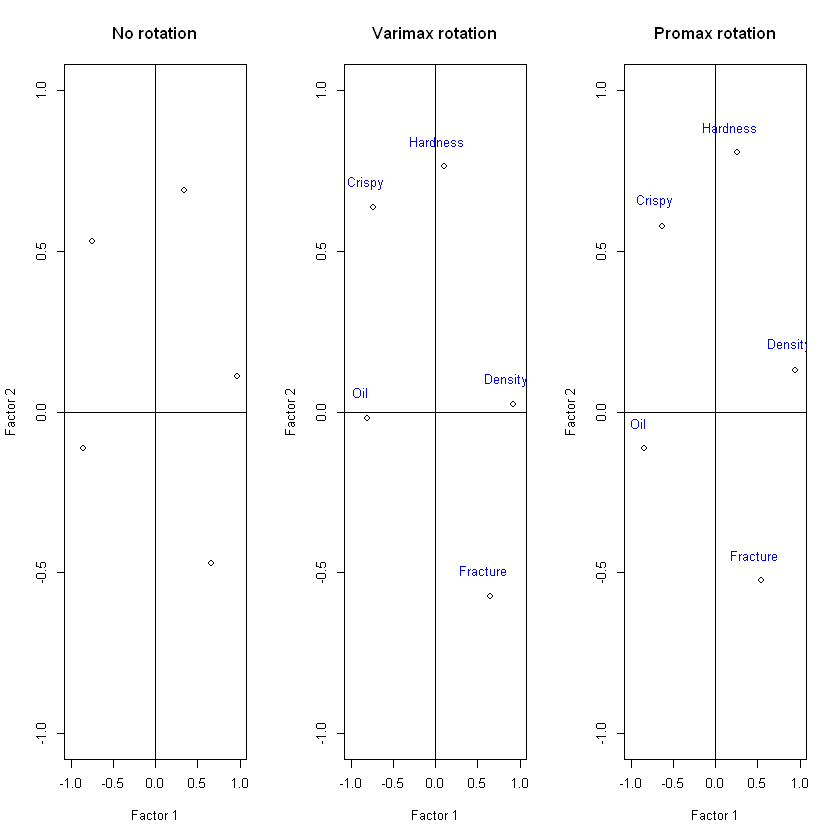

In [25]:
# Creating three different variables/rotation of factors none,varimax and promax

food.fa.none <- factanal(food, factors = 2, rotation = "none")
food.fa.varimax <- factanal(food, factors = 2, rotation = "varimax")
food.fa.promax <- factanal(food, factors = 2, rotation = "promax")

# ploting the factors with each type of rotation

# Simple plain without any rotation plot
par(mfrow = c(1,3))
plot(food.fa.none$loadings[,1], 
     food.fa.none$loadings[,2],
     xlab = "Factor 1", 
     ylab = "Factor 2", 
     ylim = c(-1,1),
     xlim = c(-1,1),
     main = "No rotation")
abline(h = 0, v = 0)

# Plot after Varimax rotation
plot(food.fa.varimax$loadings[,1], 
     food.fa.varimax$loadings[,2],
     xlab = "Factor 1", 
     ylab = "Factor 2", 
     ylim = c(-1,1),
     xlim = c(-1,1),
     main = "Varimax rotation")

text(food.fa.varimax$loadings[,1]-0.08, 
     food.fa.varimax$loadings[,2]+0.08,
      colnames(food),
      col="blue")
abline(h = 0, v = 0)

# Plot after promax rotation
plot(food.fa.promax$loadings[,1], 
     food.fa.promax$loadings[,2],
     xlab = "Factor 1", 
     ylab = "Factor 2",
     ylim = c(-1,1),
     xlim = c(-1,1),
     main = "Promax rotation")
abline(h = 0, v = 0)

text(food.fa.promax$loadings[,1]-0.08, 
     food.fa.promax$loadings[,2]+0.08,
      colnames(food),
      col="blue")
abline(h = 0, v = 0)

Interpreting the factors: If two variables both have large loadings for the same factor, then we know they have something in common.Taking a look on the figures above is appears that factor 1 accounts for pastry, which is dense and can be bend a lot before it breaks. Whereas factor 2 accounts for pastry that crispy and hard to break apart. So if we need to names these factors we would probably call them soft pastry (factor 1) and hard pastry (factor 2).

# PLSR

Partial least squares regression (PLS regression) is a statistical method that bears some relation to principal components regression; instead of finding hyperplanes of maximum variance between the response and independent variables, it finds a linear regression model by projecting the predicted variables and the observable variables to a new space. Because both the X and Y data are projected to new spaces, the PLS family of methods are known as bilinear factor models.

PLS is used to find the fundamental relations between two matrices (X and Y), i.e. a latent variable approach to modeling the covariance structures in these two spaces. A PLS model will try to find the multidimensional direction in the X space that explains the maximum multidimensional variance direction in the Y space. PLS regression is particularly suited when the matrix of predictors has more variables than observations, and when there is multicollinearity among X values. By contrast, standard regression will fail in these cases (unless it is regularized).



In [26]:
# install.packages("pls")
# install.packages("caret")
# install.packages("tidyverse")

In [27]:
# importing the Libraries
library(tidyverse)
library(caret)
library(pls)

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v tibble  3.0.3     v dplyr   1.0.2
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.5.0
v purrr   0.3.4     

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x tidyr::extract() masks raster::extract()
x dplyr::filter()  masks stats::filter()
x dplyr::lag()     masks stats::lag()
x dplyr::select()  masks raster::select(), MASS::select()

Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:purrr':

    lift



Attaching package: 'pls'


The following object is masked from 'package:caret':

    R2


The following object is masked from 'package:stats':

    loadings




In [28]:
# Load the data
# The Boston data frame has 506 rows and 14 columns (predictors).


# Attribute Information:

# crim: per capita crime rate by town.
# zn: proportion of residential land zoned for lots over 25,000 sq.ft.
# indus: proportion of non-retail business acres per town.
# chas: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
# nox: nitrogen oxides concentration (parts per 10 million).
# rm: average number of rooms per dwelling.
# age: proportion of owner-occupied units built prior to 1940.
# dis: weighted mean of distances to five Boston employment centres.
# rad: index of accessibility to radial highways.
# tax: full-value property-tax rate per $10,000.
# ptratio: pupil-teacher ratio by town.
# black: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
# lstat: lower status of the population (percent).
# medv: median value of owner-occupied homes in $1000s.



# Importing the Data, The data is already available in R
data("Boston", package = "MASS")

# Split the data into training and test set 80% train and 20% test
set.seed(123)
training.samples <- Boston$medv %>%
  createDataPartition(p = 0.8, list = FALSE)
train.data  <- Boston[training.samples, ]
test.data <- Boston[-training.samples, ]

,ncomp
,<dbl>
10,10


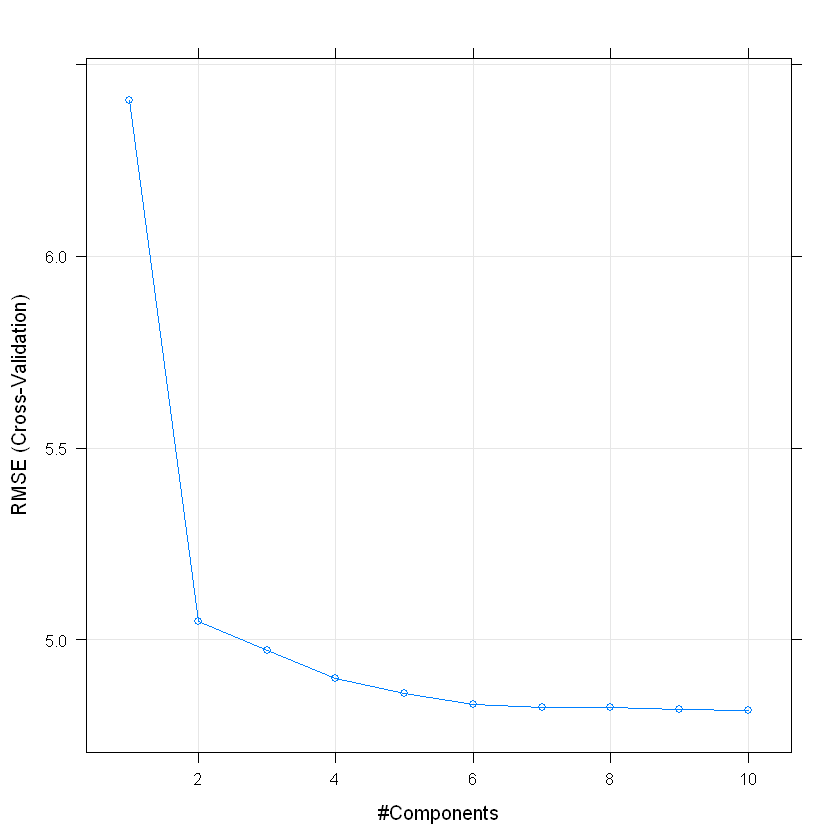

In [29]:
# Build the model on training set
set.seed(123)
model <- train(
  medv~., data = train.data, method = "pls",
  scale = TRUE,
  trControl = trainControl("cv", number = 10),
  tuneLength = 10
  )
# Plot model RMSE vs different values of components
plot(model)
# Print the best tuning parameter ncomp that
# minimize the cross-validation error, RMSE
model$bestTune

In [30]:
# Summarize the final model
summary(model$finalModel)

Data: 	X dimension: 407 13 
	Y dimension: 407 1
Fit method: oscorespls
Number of components considered: 10
TRAINING: % variance explained
          1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps
X           46.91    57.21    64.47    69.89    75.76    79.59    83.17
.outcome    49.21    70.10    71.68    72.72    73.13    73.28    73.38
          8 comps  9 comps  10 comps
X           85.82    90.83     92.65
.outcome    73.45    73.46     73.46


Now we can see X is the variability explained by the components.
The optimal number of principal components included in the PLS model is 9. This captures 90% of the variation in the predictors and 75% of the variation in the outcome variable.